# 使用K-Means聚类分割图像

k-means算法是一种无监督机器学习算法, 作用于图像中, 可以把图像中颜色相似的区域给分开.

关于k-means算法的具体原理, 这里不再赘述, 只是演示OpenCV对图像作用k-means算法的效果.

In [2]:
import utils
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

以一张蝴蝶的图片作为例子

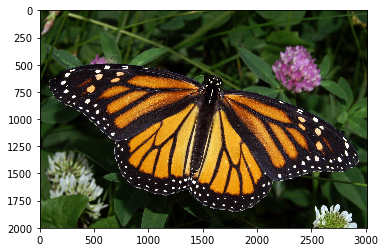

In [3]:
image = utils.imread('images/monarch.jpg')

plt.imshow(image)

进行K-Means前的准备.

In [4]:
# 将图像转换为2-D
pixel_vals = image.reshape((-1, 3))

pixel_vals = np.float32(pixel_vals)

实现K-Means聚类.

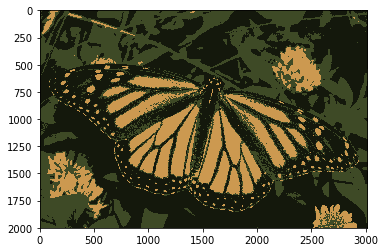

In [5]:
# 定义停止标准
# 如果想要快点收敛, 可以修改最大迭代数
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# 设定k, 执行kmeans
k = 3
_, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# 将图像转换为原来的shape
segmented_image = segmented_data.reshape((image.shape))
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

plt.imshow(segmented_image)

我们可以单独查看某一类:

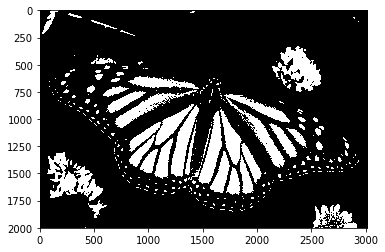

In [6]:
plt.imshow(labels_reshape == 0, cmap='gray')

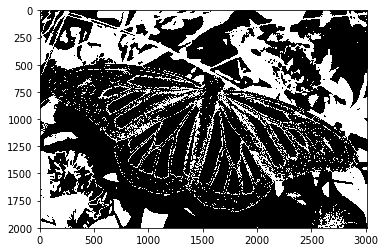

In [7]:
plt.imshow(labels_reshape == 1, cmap='gray')

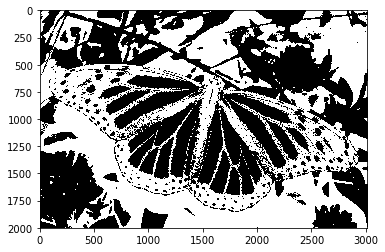

In [8]:
plt.imshow(labels_reshape == 2, cmap='gray')